Related Links  
CatBoost  
Documentation: https://catboost.ai/en/docs/  
Official GitHub: https://github.com/catboost/catboost  
Paper: http://learningsys.org/nips17/assets/papers/paper_11.pdf  

LightGBM  
Documentation: https://lightgbm.readthedocs.io/  
Official GitHub: https://github.com/microsoft/LightGBM  
Paper: https://proceedings.neurips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf  

XGBoost  
Documentation: https://xgboost.readthedocs.io/  
Official GitHub: https://github.com/dmlc/xgboost  
Paper: https://arxiv.org/pdf/1603.02754.pdf  


In [1]:
from catboost import CatBoostClassifier

train_data = [[0, 3],
              [4, 1],
              [8, 1],
              [9, 1]]
train_labels = [0, 0, 1, 1]

model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           devices='0:1')
model.fit(train_data,
          train_labels,
          verbose=False)

In [ ]:
for feature in tcc[category_cols]:
        print(f'{feature}: {tcc[feature].unique()}')

|Boosting算法|库|集成类|
|:--:|:--:|:--:|
|ADB分类|sklearn|AdaBoostClassifer|
|ADB回归|sklearn|AdaBoostRegressor|
|梯度提升树分类|sklearn|GradientBoostingClassifier|
|梯度提升树回归|sklearn|GradientBoostingRegressor|
|直方提升树分类|sklearn|HistGraidientBoostingClassifier|
|直方提升树回归|sklearn|HistGraidientBoostingRegressor|
|极限提升树|第三方库xgboost|xgboost.train()|
|轻量梯度提升树|第三方库lightgbm|lightgbm.train()|
|离散提升树|第三方库catboost|catboost.train()|

|算法|样本均衡|树数量&学习率|过拟合<br>(弱学习器&损失函数)|过拟合<br>(随机性)|过拟合<br>(提前停止)||
|---|---|---|---|---|---|---|
|GBDT|---|★★★<br>n_estimators<br>learning_rate|★<br>max_depth<br>min_samples_split<br> min_samples_leaf|★★★<br>max_features<br>subsample|★★<br>n_iter_no_change|
|XGB|★<br>scale_postive_weight=1|★★★<br>num_boost_round<br>eta|★<br>max_depth<br>lambda<br>alpha|★★★<br>num_feature<br>subsample<br>★★<br>colsample_bytree<br> colsample_bylevel<br> colsample_bynode|★★<br>early_stopping_round|
|LGBM|★<br>scale_postive_weight=1|★★★<br>num_boost_round<br>eta|★★★<br>max_depth<br>lambda_l1<br> lambda_l2<br>★★<br>min_data_in_leaf<br>max_delta_step|★★★<br>feature_fraction<br>bagging_fraction<br>|★★<br>early_stopping_round|
|RF|★★★<br>class_weight=None|★★★<br>n_estimators<br>learning_rate|★★★<br>max_depth<br>★<br>min_samples_split<br>min_samples_leaf|★★★<br>subsample<br>★★<br>max_features='auto'|---|

|XGB参数相关的流程|原生库参数|skleanAPI参数|
|----|----|--|
|损失函数|**objective**, lambda ,alpha|objective, reg_alpha, reg_lambda|
|集成规则|**eta**, base_score, eval_metric, <br>subsample, sampling_method, colsample_bytree,<br> colsample_bylevel, colsample_bynode|learning_rate, base_score, eval_metric, <br>subsample, colsample_bytree, <br>colsample_bylevel, colsample_bynode|
|弱评估器|**num_boost_round**,<br>booster, tree_method,<br>sketch_eps, updater, grow_policy|n_estimators, booster, tree_method|
|弱评估器<br>（抗过拟合）|num_feature, max_depth, <br>gamma, min_child_weight, max_delta_step, <br>max_leaves, max_bin|max_depth, gamma, <br>min_child_weight, max_delta_step|
|训练流程<br>（结果监控）|**verbosity**|verbosity|
|训练流程<br>（提前停止）|early_stopping_rounds|early_stopping_rounds|
|训练流程<br>（增量学习）||warm_start|
|随机性控制|seed|random_state|
|其他流程|**missing**, scale_pos_weight, <br>predictor, **num_parallel_tree**|n_jobs, scale_pos_weight,<br>num_parallel_tree,enable_categorical,<br>importance_type|

|GBDT参数相关的流程|参数|
|----|----|
|损失函数|**loss, alpha**|
|集成规则|init, subsample, **learning_rate**|
|弱评估器|**n_estimators, criterion**|
|弱评估器（抗过拟合）|min_samples_split, min_samples_leaf, min_weight_fraction_leaf,<br>**max_depth**, min_impurity_decrease, max_features, max_leaf_nodes, ccp_alpha|
|训练流程（结果监控）|verbose|
|训练流程（提前停止）|validation_fraction, n_iter_no_change, tol|
|训练流程（增量学习）|warm_start|
|随机性控制|random_state|

|随机森林参数类型|参数|
|---|---|
|**弱分类器数量**|**<font color="green">n_estimators</font>**|
|**弱分类器的训练数据**|**<font color="green">bootstrap, oob_score, max_samples</font>**, max_features, random_state|
|**弱分类器结构**|criterion, max_depth, min_samples_split, <br>min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes,<br>min_impurity_decrease|
|**其他**|n_jobs, verbose, ccp_alpha|

|随机森林参数影响力|参数|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>几乎总是具有巨大影响力|n_estimators（整体学习能力）<br>max_depth（粗剪枝）<br>max_features（随机性）<br>|
|⭐⭐⭐⭐<br>大部分时候具有影响力|max_samples（随机性）<br>class_weight（样本均衡）|
|⭐⭐<br>可能有大影响力<br>大部分时候影响力不明显|min_samples_split（精剪枝）<br>min_impurity_decrease（精剪枝）<br>max_leaf_nodes（精剪枝）<br>criterion（分枝敏感度）|
|⭐<br>当数据量足够大时，几乎无影响|random_state<br>ccp_alpha（结构风险）|

|GBDT参数类型|参数/属性|
|---|---|
|**迭代过程**|参数：n_estimators, learning_rate, **<font color="green">loss, alpha, init</font>**<br>属性：<font color="green">**loss_, init_, estimators_**</font>|
|**弱评估器结构**|<font color="green">**criterion**</font>, max_depth, min_samples_split, min_samples_leaf, <br>min_weight_fraction_leaf, max_leaf_nodes,<br>min_impurity_decrease|
|**提前停止**|参数：<font color="green">**validation_fraction, n_iter_no_change, tol**</font><br>属性：<font color="green">**n_estimators_**</font>|
|**弱评估器的训练数据**|参数：subsample, max_features, random_state<br>属性：<font color="green">**oob_improvement, train_score_**</font>|
|**其他**|ccp_alpha, warm_start|

|GBDT参数影响力|参数|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>几乎总是具有巨大影响力|n_estimators（整体学习能力）<br>learning_rate（整体学习速率）<br>max_features（随机性）<br>|
|⭐⭐⭐⭐<br>大部分时候具有影响力|init（初始化）<br>subsamples（随机性）<br>loss（整体学习能力）|
|⭐⭐<br>可能有大影响力<br>大部分时候影响力不明显|max_depth（粗剪枝）<br>min_samples_split（精剪枝）<br>min_impurity_decrease（精剪枝）<br>max_leaf_nodes（精剪枝）<br>criterion（分枝敏感度）|
|⭐<br>当数据量足够大时，几乎无影响|random_state<br>ccp_alpha（结构风险）|

|GBDT参数|范围|
|:-:|:-:|
|`loss`|回归损失中4种可选损失函数<br>["squared_error","absolute_error", "huber", "quantile"]|
|`criterion`|全部可选的4种不纯度评估指标<br>["friedman_mse", "squared_error", "mse", "mae"]|
|`init`|HyperOpt不支持搜索，手动调参|
|`n_estimators`|经由提前停止确认中间数50，最后范围定为(25,200,25)|
|`learning_rate`|以1.0为中心向两边延展，最后范围定为(0.05,2.05,0.05)<br>*如果算力有限，也可定为(0.1,2.1,0.1)|
|`max_features`|所有字符串，外加sqrt与auto中间的值|
|`subsample`|subsample参数的取值范围为(0,1]，因此定范围(0.1,0.8,0.1)<br>*如果算力有限，也可定为(0.5,0.8,0.1)|
|`max_depth`|以3为中心向两边延展，右侧范围定得更大。最后确认(2,30,2)|
|`min_impurity_decrease`|只能放大、不能缩小的参数，先尝试(0,5,1)范围|

|XGB参数类型|参数|
|-|-|
|**迭代过程/目标函数**|**params**: eta, base_score, objective, <font color="green">**lambda, gamma, alpha, max_delta_step**</font><br>**xgb.train()**: num_boost_round|
|**弱评估器结构**|**params**: max_depth, <font color="green">**booster, min_child_weight**</font>|
|**dart树**|**params**: <font color="green">**sample_type, normalized_type, rate_drop, one_drop, skip_drop**</font>|
|**弱评估器的训练数据**|**params**: subsample, <font color="green">**sampling_method, colsamle_bytree, colsample_bylevel, colsample_bynode**</font>|
|**提前停止**|**xgb.train()**: <font color="green">**early_stopping_rounds, evals**</font>, eval_metric|
|**其他**|**params**: seed, <font color="green">**verbosity, scale_pos_weight, nthread**</font>|

|XGB参数影响力|参数|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>几乎总是具有巨大影响力|num_boost_round（整体学习能力）<br>eta（整体学习速率）<br>|
|⭐⭐⭐⭐<br>大部分时候具有影响力|booster（整体学习能力）<br>colsample_by*（随机性）<br>gamma（结构风险 + 精剪枝）<br>lambda（结构风险 + 间接剪枝）<br> min_child_weight（精剪枝）|
|⭐⭐<br>可能有大影响力<br>大部分时候影响力不明显|max_depth（粗剪枝）<br>alpha（结构风险 + 精剪枝）<br>subsamples（随机性）<br>objective（整体学习能力）<br>scale_pos_weight（样本不均衡）|
|⭐<br>当数据量足够大时，几乎无影响|seed<br>base_score（初始化）<br>|

|XGB参数|范围|
|:-:|:-:|
|`num_boost_round`|学习曲线探索，最后定为<br>(50,200,10)|
|`eta`|以0.3为中心向两边延展，最后定为<br>(0.05,2.05,0.05)|
|`booster`|两种选项<br>["gbtree","dart"]|
|`colsample_bytree`|设置为(0,1]之间的值，但由于还有参数`bynode`，因此整体不宜定得太小，因此定为<br>(0.3,1,0.1)|
|`colsample_bynode`|设置为(0,1]之间的值，定为<br>(0.1,1,0.1)|
|`gamma`|学习曲线探索，有较大可能需要改变，定为<br>(1e6,1e7,1e6)|
|`lambda`|学习曲线探索，定为<br>(0,3,0.2)|
|`min_child_weight`|学习曲线探索，定为<br>(0,50,2)|
|`max_depth`|以6为中心向两边延展，右侧范围定得更大<br>(2,30,2)|
|`subsample`|设置为(0,1]之间的值，定为<br>(0.1,1,0.1)|
|`objective`|两种回归类模型的评估指标<br>["reg:squarederror", "reg:squaredlogerror"]|
|`rate_drop`|如果选择"dart"树所需要补充的参数，设置为(0,1]之间的值<br>(0.1,1,0.1)|

In [ ]:
def objective(trial):
    # Categorical parameter
    optimizer = trial.suggest_categorical('optimizer', ['MomentumSGD', 'Adam'])

    # Int parameter
    num_layers = trial.suggest_int('num_layers', 1, 3)

    # Uniform parameter
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 1.0)

    # Loguniform parameter
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Discrete-uniform parameter
    drop_path_rate = trial.suggest_discrete_uniform('drop_path_rate', 0.0, 1.0, 0.1)

    ...

In [ ]:
"""
Catboost重要参数解读
下面列出的是模型中一些重要的参数，以帮助大家更好学习与使用这些算法！
-------------------------------------------------------------------------------
Catboost
n_estimators：表示用于创建树的最大数量；
learning_rate：表示学习率，用于减少梯度的级别；
eval_metric：表示用于过度拟合检测和最佳模型选择的度量标准；
depth：表示树的深度；
subsample：表示数据行的采样率，不能在贝叶斯增强类型设置中使用；
l2_leaf_reg：表示成本函数的L2规则化项的系数；
random_strength：表示在选择树结构时用于对拆分评分的随机量，使用此参数可以避免模型过度拟合；
min_data_in_leaf：表示在一个叶子中训练样本的最小数量。CatBoost不会在样本总数小于指定值的叶子中搜索新的拆分；
colsample_bylevel, colsample_bytree, colsample_bynode — 分别表示各个层、各棵树、各个节点的列采样率；
task_type：表示选择“GPU”或“CPU”。如果数据集足够大（从数万个对象开始），那么在GPU上的训练与在CPU上的训练相比速度会有显著的提升，数据集越大，加速就越明显；
boosting_type：表示在默认情况下，小数据集的增强类型值设置为“Ordered”。这可以防止过度拟合，但在计算方面的成本会很高。可以尝试将此参数的值设置为“Plain”，来提高训练速度；
rsm：对于那些具有几百个特性的数据集，rsm参数加快了训练的速度，通常对训练的质量不会有影响。另外，不建议为只有少量（10-20）特征的数据集更改rsm参数的默认值；
border_count：此参数定义了每个特征的分割数。默认情况下，如果在CPU上执行训练，它的值设置为254，如果在GPU上执行训练，则设置为128；
-------------------------------------------------------------------------------
LightGBM
num_leaves：表示一棵树中最大的叶子数量。在LightGBM中，必须将num_leaves的值设置为小于2^（max_depth），以防止过度拟合。而更高的值会得到更高的准确度，但这也可能会造成过度拟合；
max_depth：表示树的最大深度，这个参数有助于防止过度拟合；
min_data_in_leaf：表示每个叶子中的最小数据量。设置一个过小的值可能会导致过度拟合；
eval_metric：表示用于过度拟合检测和最佳模型选择的度量标准；
learning_rate：表示学习率，用于降低梯度的级别；
n_estimators：表示可以创建树的最大数量；
colsample_bylevel, colsample_bytree, colsample_bynode — 分别表示各个层、各棵树、各个节点的列采样率；
boosting_type — 该参数可选择以下的值:
‘gbdt’,表示传统的梯度增强决策树；
‘dart’,缺失则符合多重累计回归树（Multiple Additive Regression Trees）；
‘goss’,表示基于梯度的单侧抽样（Gradient-based One-Side Sampling）；
‘rf’,表示随机森林（Random Forest）；
feature_fraction：表示每次迭代所使用的特征分数（即所占百分比，用小数表示）。将此值设置得较低，来提高训练速度；
min_split_again：表示当在树的叶节点上进行进一步的分区时，所需最小损失值的减少量；
n_jobs：表示并行的线程数量，如果设为-1则可以使用所有的可用线程；
bagging_fraction：表示每次迭代所使用的数据分数（即所占百分比，用小数表示）。将此值设置得较低，以提高训练速度；
application ：default（默认值）=regression, type（类型值）=enum, options（可选值）=
regression : 表示执行回归任务；
binary : 表示二进制分类；
multiclass:表示多个类的类别；
lambdarank : 表示lambdarank 应用；
max_bin：表示用于存放特征值的最大容器（bin）数。有助于防止过度拟合；
num_iterations：表示增强要执行的迭代的迭代；
"""

归一化和标准化区别

In [1]:
#From sklearn import preprocessing from scipy.Stats import rankdata x = [[1], [3], [34], [21], [10], [12]] std_x = preprocessing.StandardScaler().Fit_transform(x) norm_x = preprocessing.MinMaxScaler().Fit_transform(x) # print(std_x) # print(norm_x) print('yuánshǐ shùnxù :', Rankdata(x)) print('biāozhǔnhuà shùnxù:', Rankdata(std_x)) print('guī yī huà shùnxù:', Rankdata(norm_x))/展开

from sklearn import preprocessing
from scipy.stats import rankdata
x = [[1], [3], [34], [21], [10], [12]]
std_x = preprocessing.StandardScaler().fit_transform(x)
norm_x = preprocessing.MinMaxScaler().fit_transform(x)
# print(std_x)
# print(norm_x)
print('Original order:', rankdata(x))
print('Normalized order:', rankdata(std_x))
print('Normalization order:', rankdata(norm_x))

Original order: [1. 2. 6. 5. 3. 4.]
Normalized order: [1. 2. 6. 5. 3. 4.]
Normalization order: [1. 2. 6. 5. 3. 4.]


混淆矩阵

Automatically created module for IPython interactive environment


C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


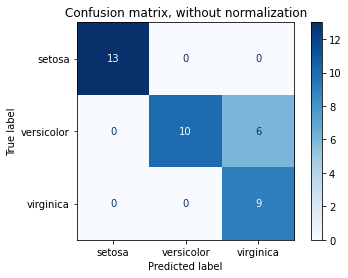

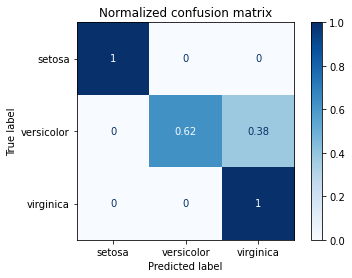

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# 导入一些数据来进行操作
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 将数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 使用过于规范化（C太低）的模型运行分类器，以查看对结果的影响
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# 绘制没有归一化的混淆矩阵
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [2]:
import sklearn
from sklearn import metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [1]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



打印字符串问题

In [3]:
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.datasets import load_iris
iris = load_iris()
iris.target#三分类数据集

for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(iris.data, iris.target)
 
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
 
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWa

In [1]:
s1 = 'Hello {}! My name is {}.'.format('World', 'Python猫')
print(s1)

Hello World! My name is Python猫.


In [ ]:
name = 'world'
myname = 'python_cat'
words = f'Hello {name}. My name is {myname}.'
print(words)

Hello world. My name is python_cat.


In [8]:
name_dict = {2:'张三', 3:'李四', 4:'王五'}
for keys, values in zip(name_dict.keys(),name_dict.values()):
    #for keys, values in zip(name_list, age_list):
    print(keys,values)

2 张三
3 李四
4 王五


In [ ]:
name_list = ['张三', '李四', '王五']
age_list = [54, 18, 34]
for name, age in zip(name_list, age_list):
    print(name, ':', age)

张三 : 54
李四 : 18
王五 : 34


In [ ]:
import matplotlib.ticker as mticker

x = range(10000,50000,10000)
y = range(10000,50000,10000)
x = pd.Series(x)/10000
y = pd.Series(y)/10000

plt.plot(x,y)
plt.xticks(range(0,5))
plt.yticks(range(0,5))
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f万'))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f万'))

In [2]:
sum=1
for i in range(2,101):
    print(f'{sum}+{i}')
    sum = sum + i
print(sum)

1+2
3+3
6+4
10+5
15+6
21+7
28+8
36+9
45+10
55+11
66+12
78+13
91+14
105+15
120+16
136+17
153+18
171+19
190+20
210+21
231+22
253+23
276+24
300+25
325+26
351+27
378+28
406+29
435+30
465+31
496+32
528+33
561+34
595+35
630+36
666+37
703+38
741+39
780+40
820+41
861+42
903+43
946+44
990+45
1035+46
1081+47
1128+48
1176+49
1225+50
1275+51
1326+52
1378+53
1431+54
1485+55
1540+56
1596+57
1653+58
1711+59
1770+60
1830+61
1891+62
1953+63
2016+64
2080+65
2145+66
2211+67
2278+68
2346+69
2415+70
2485+71
2556+72
2628+73
2701+74
2775+75
2850+76
2926+77
3003+78
3081+79
3160+80
3240+81
3321+82
3403+83
3486+84
3570+85
3655+86
3741+87
3828+88
3916+89
4005+90
4095+91
4186+92
4278+93
4371+94
4465+95
4560+96
4656+97
4753+98
4851+99
4950+100
5050


In [3]:
dict = {}
dict["Nile"]="Egypt"
dict["Yellow River"]="China"
dict["Amazon"]="Brazil"

for i,j in zip(dict.keys(),dict.values()):
    print(f'The {i} runs through {j}.')
print('-'*50)
for i,j in zip(dict.keys(),dict.values()):
    #print(f'The {i} runs through {j}.')
    print(f'{i} --> {j}')
   

The Nile runs through Egypt.
The Yellow River runs through China.
The Amazon runs through Brazil.
--------------------------------------------------
Nile --> Egypt
Yellow River --> China
Amazon --> Brazil


In [4]:
i = 1
while i <= 10:
    print(i)
    i = i + 1

1
2
3
4
5
6
7
8
9
10


In [ ]:
"""
课程目录:
——/九天&菜菜&菊安酱机器学习实战三期/
├──机器学习_资料.zip 
├──LESSON 0 前言与导学（上）.mp4  507.92M
├──LESSON 0 前言与导学（下）.mp4  665.72M
├──LESSON 1 机器学习基本概念与建模流程（上）.mp4  667.04M
├──LESSON 1 机器学习基本概念与建模流程（下）.mp4  873.00M
├──LESSON 2 矩阵运算基础、矩阵求导与最小二乘法1.mp4  548.95M
├──LESSON 2 矩阵运算基础、矩阵求导与最小二乘法2.mp4  471.44M
├──LESSON 2 矩阵运算基础、矩阵求导与最小二乘法3.mp4  1.09G
├──LESSON 3 线性回归的手动实现.mp4  53.64M
├──LESSON 3.1 变量相关性基础理论.mp4  395.16M
├──LESSON 3.2 数据生成器与Python模块编写.mp4  576.97M
├──LESSON 3.3 线性回归手动实现与模型局限.mp4  657.89M
├──LESSON 3.4 机器学习模型可信度理论与交叉验证基础.mp4  706.34M
├──LESSON 4.1 逻辑回归模型构建与多分类学习方法（上）.mp4  689.82M
├──LESSON 4.1 逻辑回归模型构建与多分类学习方法（下）.mp4  511.95M
├──LESSON 4.2 逻辑回归参数估计.mp4  752.21M
├──LESSON 4.3 梯度下降基本原理与手动实现(上).mp4  858.17M
├──LESSON 4.3 梯度下降基本原理与手动实现（下）.mp4  567.27M
├──LESSON 4.4 随机梯度下降与小批量梯度下降（上）.mp4  1.01G
├──LESSON 4.4 随机梯度下降与小批量梯度下降（下）.mp4  368.59M
├──LESSON 4.5 梯度下降优化基础：数据归一化与学习率调度（上）.mp4  1.11G
├──LESSON 4.5 梯度下降优化基础：数据归一化与学习率调度（下）.mp4  796.31M
├──LESSON 4.6 逻辑回归的手动实现方法（上）.mp4  384.48M
├──LESSON 4.6 逻辑回归的手动实现方法（下).mp4  803.52M
├──LESSON 5.1 分类模型决策边界.mp4  750.49M
├──LESSON 5.2 混淆矩阵与F1-Score.mp4  1.18G
├──LESSON 5.3 ROC-AUC的计算方法、基本原理.mp4  1.20G
├──LESSON 6.1Scikit-Learn快速入门.mp4  1.06G
├──LESSON 6.2 Scikit-Learn常用方法速通.mp4  814.75M
├──LESSON 6.3 （上）正则化、过拟合抑制.mp4  1.09G
├──LESSON 6.3（下） Scikit-Learn逻辑回归参.mp4  459.70M
├──LESSON 6.4 机器学习调参入门.mp4  957.79M
├──LESSON 6.5（上）机器学习调参基础理.mp4  367.79M
├──LESSON 6.5（下）Scikit-Learn中网格搜索.mp4  611.61M
├──LESSON 6.6.1多分类评估指标的macro与we.mp4  181.22M
├──LESSON 6.6.2 GridSearchCV的进阶使用方.mp4  202.14M
├──LESSON 7.1（上）无监督学习与K-Means基.mp4  886.32M
├──LESSON 7.1（下）K-Means聚类的Scikit-Lear.mp4  453.62M
├──LESSON 7.2 Mini Batch K-Means与DBSCAN聚类.mp4  683.26M
├──LESSON 8.1 决策树模型的核心思想与建.mp4  808.70M
├──LESSON 8.2（上）CART分类树的建模流.mp4  745.97M
├──LESSON 8.2（下）sklearn中CART分类树的参.mp4  567.79M
├──LESSON 8.3【加餐】ID3和C4.5的基本原理.mp4  516.50M
├──LESSON 8.4 CART回归树的建模流程与skle.mp4  611.01M
├──LESSON 9.1 集成算法开篇：Bagging方法的.mp4  233.40M
├──LSEEON 9.2 随机森林回归器的实现.mp4  208.78M
├──LESSON 9.3 随机森林回归器的参数.mp4  387.30M
├──LESSON 9.4 集成算法的参数空间与网格.mp4  411.72M
├──LESSON 9.5 随机森林在巨量数据上的增.mp4  351.50M
├──LESSON 9.6 Bagging及随机森林6大面试热.mp4  358.45M
├──LESSON 10.1 开篇：超参数优化与枚举网.mp4  208.09M
├──LESSON 10.2 随机网格搜索（上）.mp4  404.30M
├──LESSON 10.2 随机网格搜索（下）.mp4  247.64M
├──LESSON 10.3 Halving网格搜索（上）.mp4  284.70M
├──LESSON 10.3 Halving网格搜索（下）.mp4  215.13M
├──LESSON 10.4 贝叶斯优化的基本流程.mp4  413.20M
├──LESSON 10.5 BayesOpt vs HyperOpt vs Optuna.mp4  106.73M
├──LESSON 10.6 基于BayesOpt实现高斯过程gp.mp4  363.15M
├──LESSON 10.7 基于HyperOpt实现TPE优化.mp4  348.48M
├──LESSON 10.8 基于Optuna实现多种优化.mp4  297.32M
├──LESSON 11.1 Boosting的基本思想与基本元.mp4  134.00M
├──LESSON 11.2 AdaBoost的参数（上）：弱评.mp4  219.18M
├──LESSON 11.3 AdaBoost的参数（下）：实践.mp4  264.49M
├──LESSON 11.4 原理进阶：AdaBoost算法流程.mp4  271.85M
├──LESSON 12.1 梯度提升树的基本思想与实.mp4  331.82M
├──LESSON 12.2 迭代过程中的参数(1)：GBDT.mp4  334.71M
├──LESSON 12.3 迭代过程中的参数(2)：GBDT.mp4  229.97M
├──LESSON12.4 弱评估器结构参数：弗里德.mp4  278.19M
├──LESSON12.5 梯度提升树的提前停止.mp4  258.54M
├──LESSON12.6 袋外数据与其他参数.mp4  220.94M
├──LESSON12.7 梯度提升树的参数空间与TP.mp4  444.51M
├──LESSON12.8 原理进阶 (1)：GBDT数学流程.mp4  313.68M
├──LESSON12.9 原理进阶 (2)：拟合伪残差的.mp4  314.91M
├──LESSON13.1.1 XGBoost的基本思想.mp4  240.86M
├──LESSON13.1.2 实现XGBoost回归：sklearnAPI详.mp4  179.27M
├──LESSON13.1.3 实现XGBoost回归：xgb原生代.mp4  202.73M
├──LESSON13.1.4 实现XGBoost分类：目标函数.mp4  275.45M
├──LESSON13.2.1 基本迭代过程中的参数.mp4  154.26M
├──LESSON13.2.2 目标函数及其相关参数.mp4  249.79M
├──LESSON13.2.3 三种弱评估器与DART树详.mp4  299.00M
├──LESSON13.2.4 弱评估器的分枝：结构分.mp4  191.51M
├──LESSON13.2.5 控制复杂度：弱评估器的.mp4  254.70M
├──LESSON13.2.6 XGBoost中的必要功能性参.mp4  98.96M
├──LESSON 13.3.1 XGBoost的参数空间.mp4  295.38M
├──LESSON 13.3.2 XGBoost基于TPE的调参.mp4  198.23M
├──LESSON 13.4.1 XGBoost的基本数学流程.mp4  217.80M
├──LESSON 13.4.2 化简XGBoost的目标函数.mp4  188.57M
├──LESSON 13.4.3 求解XGBoost的损失函数.mp4  140.54M
├──【电信用户流失】Part 1.1 业务背景与.mp4  208.35M
├──【电信用户流失】Part 1.2 数据字段解.mp4  92.59M
├──【电信用户流失】Part 1.6 数据探索性.mp4  94.12M
├──【电信用户流失】Part 2.10 逻辑回归.mp4  136.43M
├──【电信用户流失】Part 2.11 决策树模.mp4  94.25M
├──【电信用户流失】Part 2.12 决策树模.mp4  144.61M
├──【电信用户流失】Part 2.7 逻辑回归机.mp4  178.07M
├──【电信用户流失】Part 2.8 逻辑回归机.mp4  197.40M
├──【电信用户流失】Part 2.9自定义sklea.mp4  240.75M
├──【实战技巧】Part 4.0第四部分导学.mp4  53.59M
├──【实战技巧】Part 4.1 海量特征衍生与 (下).mp4  226.79M
├──【实战技巧】Part 4.1 海量特征衍生与筛选（上）.mp4  168.60M
├──【实战技巧】Part 4.2 网格搜索超参数 (上).mp4  392.56M
├──【实战技巧】Part 4.2 网格搜索超参数（下）.mp4  362.07M
├──【特征工程】Part 1.3 字段类型转化与.mp4  206.89M
├──【特征工程】Part 1.4 异常值检测.mp4  67.52M
├──【特征工程】Part 1.5 相关性分析.mp4  112.83M
├──【特征工程】Part 2.1数据重编码：Or.mp4  119.91M
├──【特征工程】Part 2.2 数据重编码：O.mp4  138.55M
├──【特征工程】Part 2.3 转化器流水线：.mp4  128.08M
├──【特征工程】Part 2.4 特征变换：数据.mp4  57.80M
├──【特征工程】Part 2.5 连续变量分箱：.mp4  159.94M
├──【特征工程】Part 2.6 连续变量分箱：.mp4  104.52M
├──【特征工程】Part 3.1.1 特征衍生方法.mp4  149.74M
├──【特征工程】Part 3.1.2 基于业务的新.mp4  139.17M
├──【特征工程】Part 3.1.3 基于业务的服.mp4  133.75M
├──【特征工程】Part 3.1.4 基于数据探索.mp4  148.29M
├──【特征工程】Part 3.1.5 借助IV值检验.mp4  181.29M
├──【特征工程】Part 3.1.6 基于数据探索.mp4  45.76M
├──【特征工程】Part 3.2.1 单变量特征衍.mp4  212.10M
├──【特征工程】Part 3.2.10 多变量多项式.mp4  166.63M
├──【特征工程】Part 3.2.11 时序特征分析.mp4  198.72M
├──【特征工程】Part 3.2.12 时序特征衍生.mp4  135.39M
├──【特征工程】Part 3.2.13 时序特征衍生.mp4  211.98M
├──【特征工程】Part 3.2.14 时序特征衍生.mp4  127.96M
├──【特征工程】Part 3.2.15 时间序列分析.mp4  186.64M
├──【特征工程】Part 3.2.16 词向量化与T.mp4  238.88M
├──【特征工程】Part 3.2.17 NLP特征衍生方.mp4  234.36M
├──【特征工程】Part 3.2.18 NLP特征衍生函.mp4  210.06M
├──【特征工程】Part 3.2.19 交叉组合与多.mp4  242.59M
├──【特征工程】Part 3.2.2 四则运算衍生.mp4  162.32M
├──【特征工程】Part 3.2.20 分组统计高阶.mp4  248.80M
├──【特征工程】Part 3.2.21 目标编码.mp4  289.33M
├──【特征工程】Part 3.2.22 关键特征衍生.mp4  155.13M
├──【特征工程】Part 3.2.23特征衍生实战.mp4  332.08M
├──【特征工程】Part 3.2.24 特征衍生实战.mp4  366.76M
├──【特征工程】Part 3.2.25 特征衍生实战.mp4  368.95M
├──【特征工程】Part 3.2.26 特征衍生实战.mp4  306.65M
├──【特征工程】Part 3.2.3 分组统计特征.mp4  342.96M
├──【特征工程】Part 3.2.4 多项式特征衍.mp4  111.53M
├──【特征工程】Part 3.2.5 统计演变特.mp4  119.68M
├──【特征工程】Part 3.2.6 多变量交叉组.mp4  154.68M
├──【特征工程】Part 3.2.7 多变量分组统.mp4  156.09M
├──【特征工程】Part 3.2.8 多变量分组统.mp4  141.22M
├──【特征工程】Part 3.2.9 多变量多项式.mp4  181.84M
├──【特征筛选】Part 3.3.0 特征筛选技术.mp4  138.51M
├──【特征筛选】Part 3.3.1 缺失值过滤与.mp4  178.20M
├──【特征筛选】Part 3.3.10 互信息法特征.mp4  188.41M
├──【特征筛选】Part 3.3.11 feature_importan.mp4  312.40M
├──【特征筛选】Part 3.3.12 RFE筛选与RFEC.mp4  349.96M
├──【特征筛选】Part 3.3.13 SFS方法与SFM方.mp4  199.38M
├──【特征筛选】Part 3.3.14 特征筛选方法.mp4  284.13M
├──【特征筛选】Part 3.3.2 评分函数与特.mp4  216.77M
├──【特征筛选】Part 3.3.3 假设检验基本.mp4  157.20M
├──【特征筛选】Part 3.3.4 卡方检验与特.mp4  329.43M
├──【特征筛选】Part 3.3.5 方差分析与特.mp4  231.76M
├──【特征筛选】Part 3.3.6 线性相关性的.mp4  65.39M
├──【特征筛选】Part 3.3.7 离散变量之间.mp4  297.79M
├──【特征筛选】Part 3.3.8 连续变量与离.mp4  328.42M
└──【特征筛选】Part 3.3.9 连续变量之间.mp4  186.11M
"""